Below are the steps which I am going to take for building the model.
1. Understand the data
2. Univariate analysis
3. Bi-variate Analysis
4. Outlier Treatment
5. Missing Data Treatment
6. Variable Transformation
7. Build a Mode

In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [2]:
# Read data file
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Understand the data

In [3]:
# Understand the train data
print('Train data shape:', train.shape)
train.head()

Train data shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Understand the test data
print('Test data shape:', test.shape)
test.head()

Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Understand the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 80 different categories and 1,460 different observation.

# Univariate Analysis

|n mu = 180921.20 and sigma = 79415.29



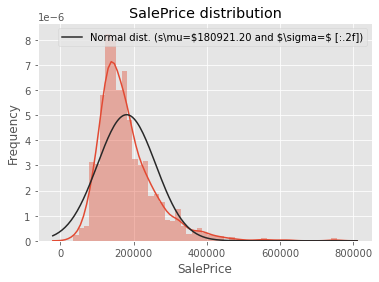

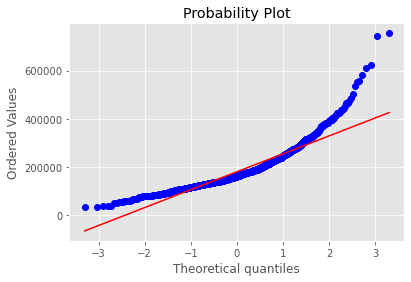

In [6]:
# Understand the target - SalePrice
sns.distplot(train['SalePrice'], fit=norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('|n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Name the plot
plt.legend(['Normal dist. (s\mu=${:.2f} and $\sigma=$ [:.2f])'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig=plt.figure()
res=stats.probplot(train['SalePrice'], plot=plt)
plt.show()

As we can see from the above, the SalePrice has certain characteristics as below:
1. The SalePrice is deviate from the normal distribution
2. The variable is right skewed
3. it shows peakendess

In [7]:
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

The average sale housing price in this area is $180,921. The highest sale price is $755,000 abd the lowest sale price is $34,990.

# Bi-variate Analysis
Let's take a look at the data correlation first.

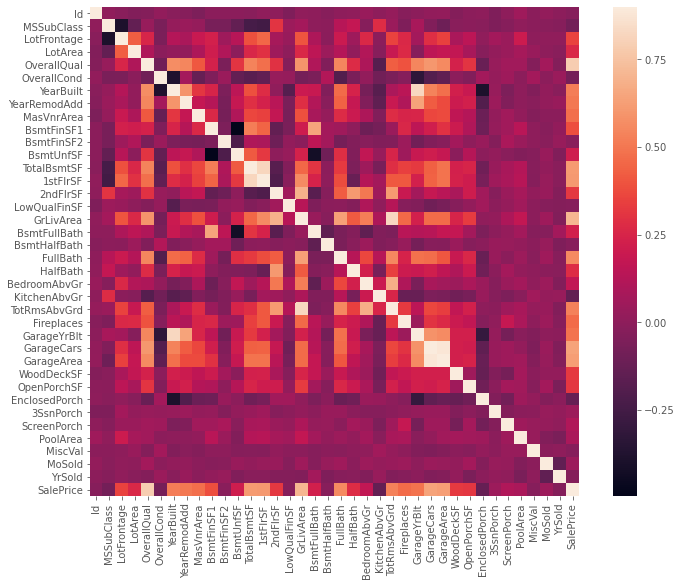

In [8]:
# Using the correlation map to see the correlation between each varaible
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

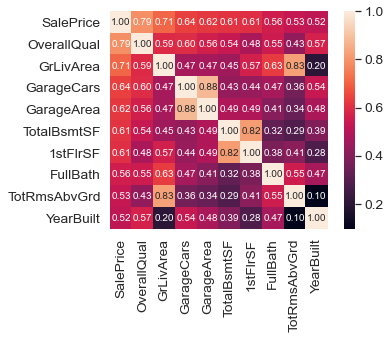

In [9]:
# Create the saleprice correlation matrix
k=10 # number of variables for correlation map
cols=corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm= np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

From the above chart, we can see 
1. SalePrice is highly correlatd with OverallQual and GrLivArea.
2. GageCars and GarageArea are strongly correlated with SalePrice. However, the number of cars parking in the grage is a consequence of the GarageArea. Therefore, one varaible for our analysis should be enoough.
3. Before running the correlation map, I thought the YearBuilt would highly correlated with the SalePrice. However, it turns out the correlation is slighly higher than 0.5. 
4. TotalBsmtSF and 1stFlrSF are highly correlated to each other. So, one variable for our analysis should be enough.
5. TotRmsAbvGrd and GrLivArea are highly correlated. So, it is not necessary to have these two variables at the same time. So, GrLivArea variable for our analysis should be enough.

C:\Users\hiefu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


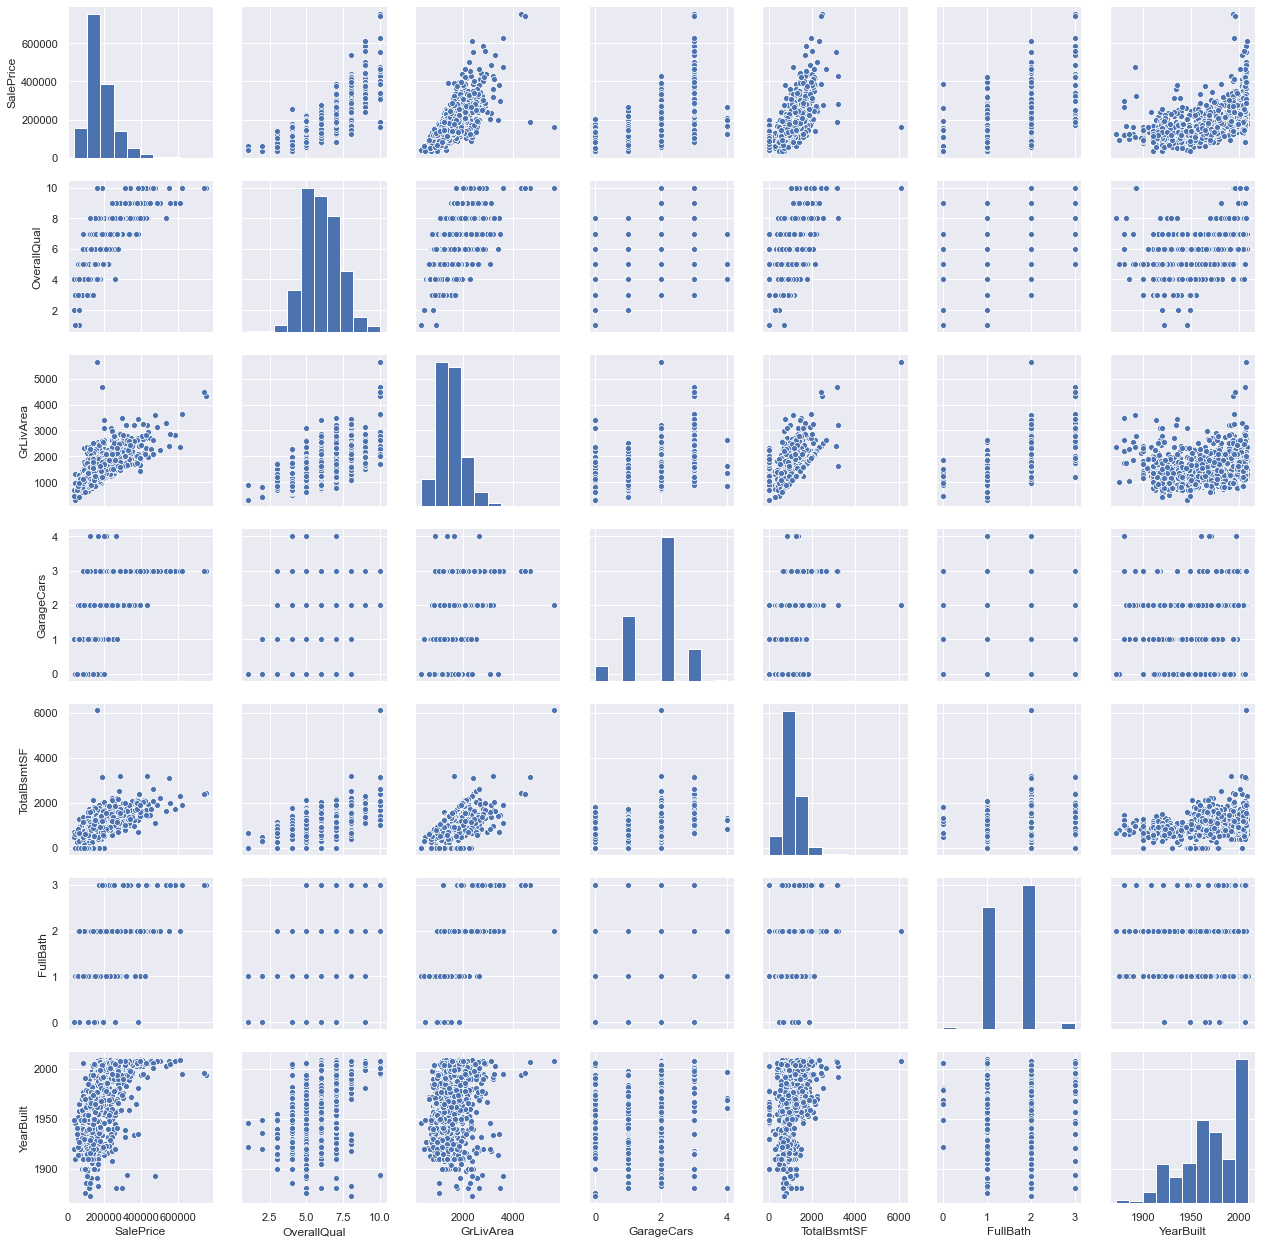

In [10]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

This scatter plot gives us an idea about variables relationships.

One interesting scatter plots is the one between 'TotalBsmtSF' and 'GrLiveArea'. We can see the dots drawing a linear line, andmajority of the dots stay below that line. It indicates that basement areas can be equal to the above ground living area, but not bigger than the above ground living area. 

Also, the plot of SalePrice and YearBuilt which tells us that the recent YearBuilt house seems to have higher price. 



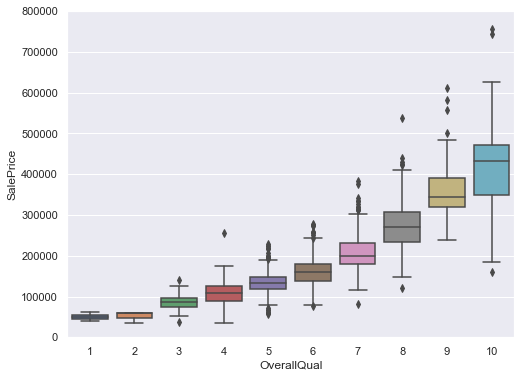

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

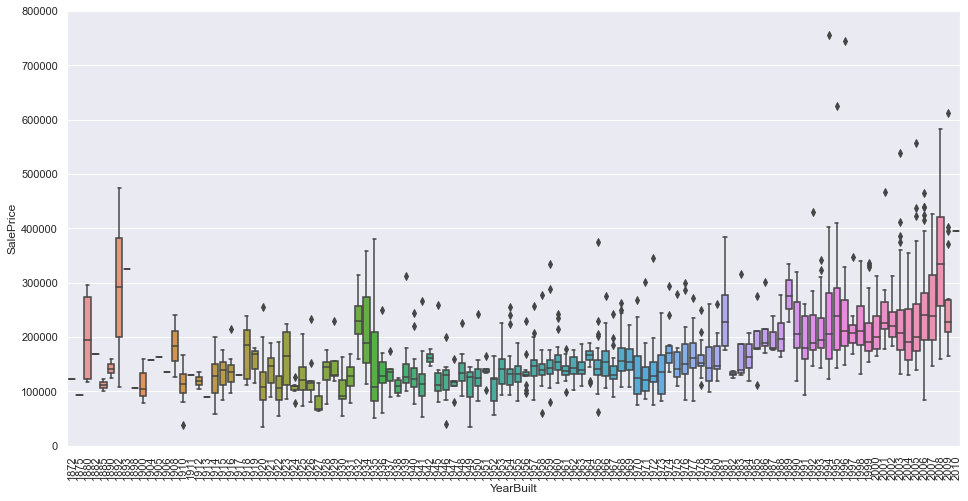

In [13]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Outlier Treatment

Now, let's identify the outlier and deal with it.

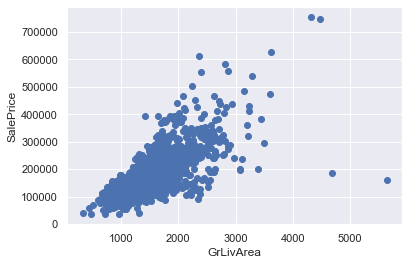

In [14]:
# Check wheter there is an outlier in GrLivArea
fig, ax =plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

From the above chart, we can see there are two outliers at the bottom right. These values are huge; therefore, we will delet them

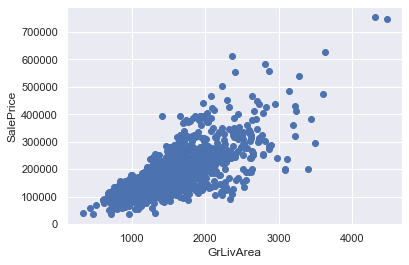

In [15]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Check the chart again
fig, ax=plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

# Missing Data Treatment

In [16]:
# Let's concatenate the train and test data
ntrain =train.shape[0]
ntest = test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('all_data size is :{}'.format(all_data.shape))

all_data size is :(2917, 80)


In [17]:
# Missing data
total=(all_data.isnull().sum()).sort_values(ascending=False)
percent = (all_data.isnull().sum()/len(all_data)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data.drop(missing_data[total==0].index)
missing_data.head(50)

,Total,Percent
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageCond,159,5.451
GarageQual,159,5.451
GarageYrBlt,159,5.451
GarageFinish,159,5.451


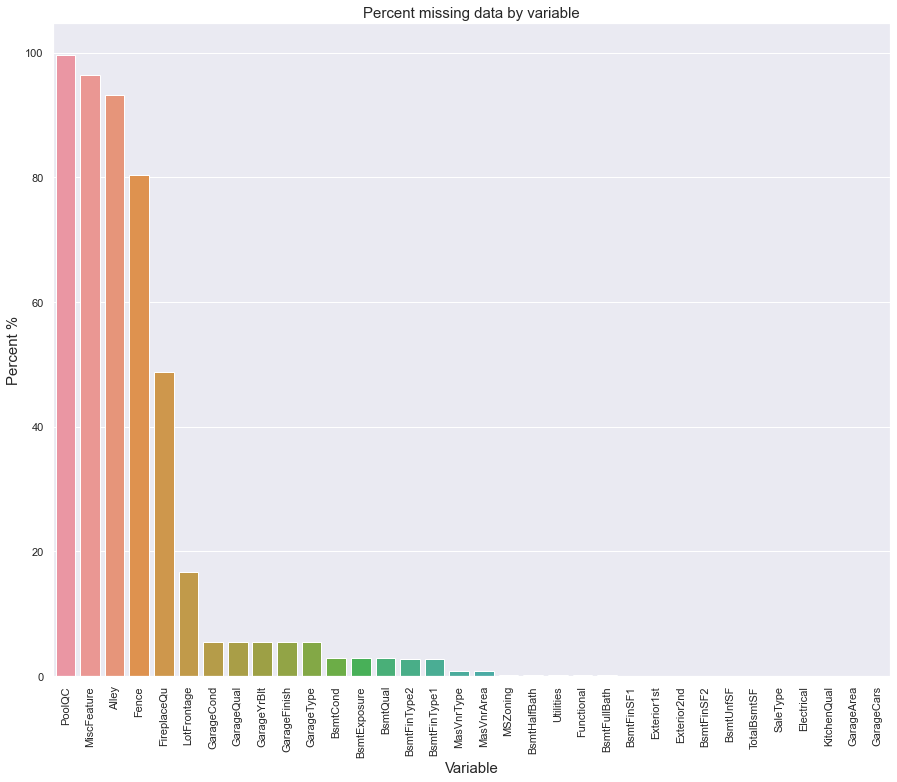

In [18]:
f, ax=plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Variable', fontsize=15)
plt.ylabel('Percent %', fontsize=15)
plt.title('Percent missing data by variable', fontsize=15)
plt.show()

We will delete the variable when there is more than 15% data is missing which indicates the data quality of this variable is pretty low. Based on this, we will delete the following variables, PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage.  

In [19]:
# Drop the variable including the redundant variable from correlation map
all_data=all_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'])
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
For all these categorical basement-related features, NaN means that there is no basement.

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [25]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [26]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [27]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [28]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [29]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [30]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [31]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [33]:
# Check whethere there is any missing data, or not?
total=(all_data.isnull().sum()).sort_values(ascending=False)
percent = (all_data.isnull().sum()/len(all_data)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data.drop(missing_data[total==0].index)
missing_data.head(50)

,Total,Percent


From the above information, we can see there is no missing value for this data set beside the SalePrice from the test data.


# Variable Transformation

In [34]:
#convert categorical variable into dummy
all_data = pd.get_dummies(all_data)

# Build a Model

In [35]:
# Now let's get the new train and test sets
train=all_data[:ntrain]
test=all_data[ntrain:]

In [36]:
train.tail(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1458,70,9042,7,9,1941,2006,0.000,275.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1456,1459,20,9717,5,6,1950,1996,0.000,49.000,1029.000,...,0,0,0,1,0,0,0,0,1,0
1457,1460,20,9937,5,6,1965,1965,0.000,830.000,290.000,...,0,0,0,1,0,0,0,0,1,0


In [37]:
test.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,1461,20,11622,5,6,1961,1961,0.000,468.000,144.000,...,0,0,0,1,0,0,0,0,1,0
1459,1462,20,14267,6,6,1958,1958,108.000,923.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1460,1463,60,13830,5,5,1997,1998,0.000,791.000,0.000,...,0,0,0,1,0,0,0,0,1,0


In [38]:
# Build a linear Model
y=np.log(y_train)
X=train.drop(['Id'], axis=1)

We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.

In [39]:
# Split the train data into two parts, test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [40]:
# Create a Linear Regression
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [41]:
# Fit the train data and get the R^2 for the test data 
model_1 = lr.fit(X_train, y_train)
print ("Training set score (R^2):{:.2f}".format(model_1.score(X_train, y_train)))
print("Test set score:{:.2f}".format(model_1.score(X_test, y_test)))

Training set score (R^2):0.95
Test set score:0.89


From the above information, this model can explain approximately 89% of the variance. 

In [42]:
# Create a Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

Training set score:0.95
Test set score:0.91


In [43]:
# Create a Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_train, y_train)))


Training set score:0.84
Test set score:0.84


From the above models, we can see the linear and ridge regression have the same R^2 on the train data, but ridge regression has better R^2 on the test data set. The reason is with linear regression, we might overfitting the training data. For Ridge regression model, it is more restricted model, so we are less likely to overfit.

As we can see, Lasso does quite badly comparing with the other two models which indicates that we are underfitting. So, based on the above information, we will use Ridge Regression model for this competition.

In [44]:
test.head(4)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,1461,20,11622,5,6,1961,1961,0.000,468.000,144.000,...,0,0,0,1,0,0,0,0,1,0
1459,1462,20,14267,6,6,1958,1958,108.000,923.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1460,1463,60,13830,5,5,1997,1998,0.000,791.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1461,1464,60,9978,6,6,1998,1998,20.000,602.000,0.000,...,0,0,0,1,0,0,0,0,1,0


In [45]:
#Submission
submission=pd.DataFrame()
submission['Id']=test.Id

In [46]:
#convert categorical variable into dummy
test = pd.get_dummies(test)

In [47]:
test.head(4)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,1461,20,11622,5,6,1961,1961,0.000,468.000,144.000,...,0,0,0,1,0,0,0,0,1,0
1459,1462,20,14267,6,6,1958,1958,108.000,923.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1460,1463,60,13830,5,5,1997,1998,0.000,791.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1461,1464,60,9978,6,6,1998,1998,20.000,602.000,0.000,...,0,0,0,1,0,0,0,0,1,0


In [48]:
test_1=test.drop(['Id'], axis=1)

In [49]:
prediction=ridge.predict(test_1)

In [50]:
# I will apply np.exp() to my predictio because I have taken the log previously. 
final_predictions=np.exp(prediction)

In [51]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
1458,1461,112715.815
1459,1462,117402.076
1460,1463,182442.435
1461,1464,199272.342
1462,1465,193081.917


In [52]:
submission.to_csv('MSDS_422_Assignment_2.csv', index=False)

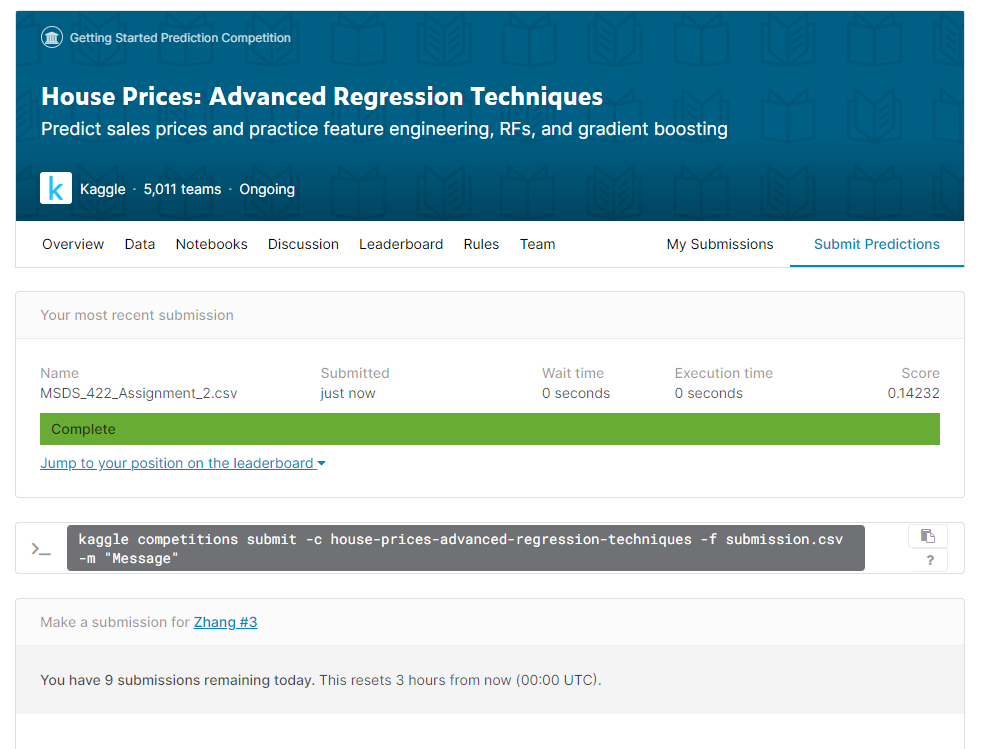

In [53]:
from IPython.display import Image
Image("Assignment 2.png")


